# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Baskoro Bayu Baruno
- **Email:** baskoro.baruno@gmail.com
- **ID Dicoding:** baskoro_baruno

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi penjual di berbagai wilayah, dan bagaimana pengaruhnya terhadap kinerja pasar secara keseluruhan?
2. Bagaimana lokasi penjual memengaruhi waktu pengiriman dan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [96]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from datetime import datetime

## Data Wrangling

### Gathering Data

#### Load Product Table

In [3]:
product_df = pd.read_csv('dataset/products_dataset.csv')
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight:**
- Ini adalah tabel produk yang menyimpan data detail tentang produk di public e-commerce
- terdapat 32951 baris dan 9 kolom
- Kolom terdiri dari :
product_id
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm


#### Load Seller Table

In [4]:
seller_df = pd.read_csv('dataset/sellers_dataset.csv')
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
- Ini adalah tabel seller yang menyimpan data detail tentang seller di public e-commerce
- terdapat 3095 baris dan 4 kolom

#### Load Customers Table

In [5]:
customers_df = pd.read_csv('dataset/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Insight:**
- xxx
- xxx

#### Load Order Table

In [6]:
orders_df = pd.read_csv('dataset/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight:**
- xxx
- xxx

#### Load Order Items Table

In [7]:
orderItems_df = pd.read_csv('dataset/order_items_dataset.csv')
orderItems_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight:**
- xxx
- xxx

#### Load Order Payments Table

In [8]:
orderPayments_df = pd.read_csv('dataset/order_payments_dataset.csv')
orderPayments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Insight:**
- xxx
- xxx

#### Load Order Review Table

In [9]:
orderReviews_df = pd.read_csv('dataset/order_reviews_dataset.csv')
orderReviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Insight:**
- xxx
- xxx

#### Load Geolocation Table

In [10]:
geolocations_df = pd.read_csv('dataset/geolocation_dataset.csv')
geolocations_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai Data Product

In [11]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Tidak ada kesalahan tipe data dari table tersebut
- Adba  perbedaan jumlah data seharusnya data ada 32951 sedangkan di beberapa kolom yang lain datanya kurang dari itu
ini menandakan masih ada missing value 


In [12]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- ini adalah tabel banyaknya missing value di setiap kolom
product_df.isnull().sum()
- kolom product_category_name, product_name_lenght, product_description_lenght dan product_photos_qty terdapat 610 missing value
- kolom product_weight_g, product_length_cm, product_height_cm dan product_width_cm terdapat 6 missing value


In [14]:
print("Jumlah Duplikasi :", product_df.duplicated().sum() )

Jumlah Duplikasi : 0


**Insight:**
- Tidak ada Duplikasi di data ini

In [15]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tidak ada keanehan dalam data ini 

#### Menilai Data Seller

In [16]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Tidak ada missing value dalam data ini 
- Data type sudah sesuai

In [20]:
print("Jumlah Duplikasi :", seller_df.duplicated().sum())
seller_df.describe()

Jumlah Duplikasi : 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak ada Duplikat data dalam data ini
- tidak ada keanehan dalam data ini

**Dalan data seller ini tidak ada missing value, duplikat data dan kenehan data maka data seller ini sudah clean**

#### Menilai Data Customer

In [21]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Tidak ada missing value dalam data ini
- Data Type sudah sesuai

In [22]:
print("Jumlah Duplikasi :", customers_df.duplicated().sum())
customers_df.describe()

Jumlah Duplikasi : 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak ada duplikasi data dalam data ini
- Tidak ada keanehan dalam data ini

**Dalam data customer ini tidak ada missing value, duplikasi data dan keanehan data maka dataset ini clean**

#### Menilai Data Order

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Terdapat perbedaan jumlah non null count di kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date 
ini menandakan danya missing value
- Beberapa kolom tipe datanya tidak sesuai 

In [35]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- dalam kolom order_approved_at ada 160 missing value
- dalam kolom order_delivered_carrier_date ada 1783 missing value
- dalam kolom order_delivered_customer_date ada 2965 missing value

In [25]:
print("Jumlah Duplikas :", orders_df.duplicated().sum())
orders_df.describe()

Jumlah Duplikas : 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Tidak Ada Duplikasi data
- Tidak ada keanehan dalam data

#### Menilai Data Order Item

In [26]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Tidak ada missing value
- Ada kolom yang data typenya tidak sesuai

In [27]:
print("Jumlah Duplikas :", orderItems_df.duplicated().sum())
orderItems_df.describe()

Jumlah Duplikas : 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ada duplikasi dalam data
- Tidak ada keanehan dalam data

#### Menilai Data Order Payments

In [28]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Tidak ada Missing Value
- Data Type sudah sesuai

In [30]:
print("Jumlah Duplikas :", orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Jumlah Duplikas : 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak ada duplikasi data
- Tidak ada keanehan dalam data

#### Menilai Data Order Review

In [31]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- Terdapat perbedaan jumlah non null count di kolom review_comment_title dan review_comment_message
ini menandakan adanya missing value pada kolom tersebut
- Ada data type yang tidak sesuai 

In [36]:
orderReviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight:**
- dalam kolom review_comment_title ada 87656 missing value
- dalam kolom review_comment_message ada 58247 missing value

In [32]:
print("Jumlah Duplikas :", orderReviews_df.duplicated().sum())
orderReviews_df.describe()

Jumlah Duplikas : 0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tidak ada data duplikat
- Tidak ada keanehan data

#### Menilai Data Geolocation Table

In [33]:
geolocations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight:**
- Tidak ada missing value
- Data type sudah sesuai

In [34]:
print("Jumlah Duplikas :", geolocations_df.duplicated().sum())
geolocations_df.describe()

Jumlah Duplikas : 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Terdapat duplikasi data dengan jumlah 261831
- Tidak ada keanehan 

#### Hasil Assessing Data
|                | Tipe Data | Missing Value | Duplicate Data | Inaccurrate Value |
|----------------|-----------|---------------|----------------|-------------------|
| Product        | -         | ada           | -              | -                 |
| Seller         | -         | -             | -              | -                 |
| Customer       | -         | -             | -              | -                 | 
| Order          | ada       | ada           | -              | -                 | 
| Order Items    | ada       | -             | -              | -                 |
| Order Payments | -         | -             | -              | -                 |
| Order Review   | ada       | ada           | -              | -                 |
| Geolocation    | -         | -             | ada            | -                 |

Dari tabel di atas - menyatakan tidak ada masalah sedangkan 'ada' menyatakan ada masalah
Data Seller, Customer dan Order Payments tidak ada msalah menandakan data ini sudah clean


### Cleaning Data

#### Cleaning Data Product

In [40]:
product_df[product_df.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight:**
- xxx
- xxx

In [45]:
#Mengisi missing walue di kolom produk_category_name menjadi "other"
product_df['product_category_name'].fillna('Others', inplace=True)

#Mengisi missing value di kolom product_photos_qty dengan 0 karena asumsi penjual tidak moto barangnya 
product_df['product_photos_qty'].fillna(0, inplace=True)

#Mengisi missing value dengan median
product_df['product_weight_g'].fillna(product_df['product_weight_g'].median(), inplace=True)
product_df['product_length_cm'].fillna(product_df['product_length_cm'].median(), inplace=True)
product_df['product_height_cm'].fillna(product_df['product_height_cm'].median(), inplace=True)
product_df['product_width_cm'].fillna(product_df['product_width_cm'].median(), inplace=True)
product_df['product_name_lenght'].fillna(product_df['product_name_lenght'].median(), inplace=True)
product_df['product_description_lenght'].fillna(product_df['product_description_lenght'].median(), inplace=True)

print(product_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


"**Insight:**
- xxx
- xxx

#### Cleaning Data Order


Ini adalah kumpulan data yang paling penting karena seperti tabel penghubung, dan terhubung ke banyak kumpulan data lainnya berdasarkan order_id.

In [48]:
def clean_order_data(df):
    date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date', 
                    'order_estimated_delivery_date']
    
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    

    df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace=True)
    

    mask = (
        (df['order_approved_at'] >= df['order_purchase_timestamp']) &
        (df['order_delivered_carrier_date'].isna() | (df['order_delivered_carrier_date'] >= df['order_approved_at'])) &
        (df['order_delivered_customer_date'].isna() | (df['order_delivered_customer_date'] >= df['order_delivered_carrier_date']))
    )
    df = df[mask]
    

    current_date = pd.Timestamp.now()
    for col in date_columns:
        df = df[df[col] <= current_date]
    

    valid_statuses = ['created', 'approved', 'shipped', 'delivered', 'canceled']
    df = df[df['order_status'].isin(valid_statuses)]
    
    return df

**Insight:**
- xxx
- xxx

In [49]:
cleaned_orders_df = clean_order_data(orders_df)

# Display info of cleaned dataframe
print("Cleaned dataframe info:")
cleaned_orders_df.info()

Cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 95102 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95102 non-null  object        
 1   customer_id                    95102 non-null  object        
 2   order_status                   95102 non-null  object        
 3   order_purchase_timestamp       95102 non-null  datetime64[ns]
 4   order_approved_at              95102 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95102 non-null  datetime64[ns]
 6   order_delivered_customer_date  95102 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95102 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.5+ MB


#### Cleaning Data Order Items

In [54]:
orderItems_df['shipping_limit_date'] = pd.to_datetime(orderItems_df['shipping_limit_date'], errors='coerce')
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- xxx
- xxx

#### Cleaning Data Order Review

In [53]:
orderReviews_df['review_creation_date'] = pd.to_datetime(orderReviews_df['review_creation_date'], errors='coerce')
orderReviews_df['review_answer_timestamp'] = pd.to_datetime(orderReviews_df['review_answer_timestamp'], errors='coerce')


orderReviews_df['review_comment_title'].fillna('No comment title', inplace=True)
orderReviews_df['review_comment_message'].fillna('No comment message', inplace=True)
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- xxx
- xxx

#### Cleaning Data Geolocation

In [56]:
geolocations_df.drop_duplicates(inplace=True)
print("Jumlah Duplikas :", geolocations_df.duplicated().sum())


Jumlah Duplikas : 0


**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Product

In [60]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)


product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 74, dtype: int64

### Explore Seller

In [76]:
seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [78]:
item_seller_df = pd.merge(
    left=orderItems_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [108]:
order_seller_df = pd.merge(
    left= item_seller_df,
    right = orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_seller_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7.0,15
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,18
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7.0,21
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,11
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,40


In [112]:
riview_seller_df = pd.merge(
    left=order_seller_df,
    right=orderReviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
riview_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,estimated_delivery_time,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,2017-09-20 23:43:48,2017-09-29,7.0,15,97ca439bc427b48bc1cd7177abe71365,5.0,No comment title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,2017-05-12 16:04:24,2017-05-15,16.0,18,7b07bacd811c4117b742569b04ce3580,4.0,No comment title,No comment message,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,2018-01-22 13:19:16,2018-02-05,7.0,21,0c5b33dea94867d1ac402749e5438e8b,5.0,No comment title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,2018-08-14 13:32:39,2018-08-20,6.0,11,f4028d019cb58564807486a6aaf33817,4.0,No comment title,No comment message,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,2017-03-01 16:42:31,2017-03-17,25.0,40,940144190dcba6351888cafa43f3a3a5,5.0,No comment title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [79]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [80]:
sellers_df.sort_values(by="price", ascending=False)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [82]:
sellers_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                           nunique    min      max
product_category_name                             
Unknown                       1451   3.00  3980.00
agro_industria_e_comercio      182  12.99  2990.00
alimentos                      450   9.99   274.99
alimentos_bebidas              227   6.50   699.90
artes                          202   3.50  6499.00
...                            ...    ...      ...
sinalizacao_e_seguranca        140   4.50   740.00
tablets_impressao_imagem        79  14.90   889.99
telefonia                     4199   5.00  2428.00
telefonia_fixa                 217   6.00  1790.00
utilidades_domesticas         5884   3.06  6735.00

[74 rows x 3 columns]

**Insight:**
- xxx
- xxx

### Explore Customer

In [59]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [65]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- xxx
- xxx

### Explore Order

In [66]:
orders_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False)


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: customer_id, dtype: int64

**Insight:**
- xxx
- xxx

### Explore Order & customer

In [67]:
customers_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [68]:
payments_reviews_df = pd.merge(
    left=orderPayments_df,
    right=orderReviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No comment title,No comment message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No comment title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No comment title,No comment message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No comment title,No comment message,2017-12-21,2017-12-22 01:10:39


In [69]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No comment title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No comment title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No comment title,No comment message,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No comment title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No comment title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No comment message,2018-08-24,2018-08-25 02:24:54


In [70]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

In [71]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No comment title,No comment message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No comment title,No comment message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No comment title,No comment message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No comment title,No comment message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


**Insight:**
- xxx
- xxx

### Explore Order Payments

In [63]:
orderPayments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

**Insight:**
- xxx
- xxx

### Explore Order Review

In [85]:
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days

order_reviews = orders_df.merge(orderReviews_df, on='order_id', how='inner')
delivery_time_review_score = order_reviews.groupby('review_score')['delivery_time'].describe()
print(delivery_time_review_score)


                count       mean        std  min  25%   50%   75%    max
review_score                                                            
1              9409.0  20.849825  16.059046  0.0  9.0  16.0  30.0  195.0
2              2941.0  16.194832  12.486474  1.0  8.0  13.0  22.0  208.0
3              7962.0  13.795278   9.943568  0.0  7.0  12.0  18.0  188.0
4             18987.0  11.848054   8.291362  0.0  7.0  10.0  15.0  194.0
5             57060.0  10.224097   6.824501  0.0  6.0   9.0  13.0  187.0


 **Insight:**
- xxx
- xxx

### Explore Geolocation

In [73]:
geolocations_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)


geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi penjual di berbagai wilayah, dan bagaimana pengaruhnya terhadap kinerja pasar secara keseluruhan?

/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/1656435505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_distribution.index, y=seller_distribution.values, palette='viridis')


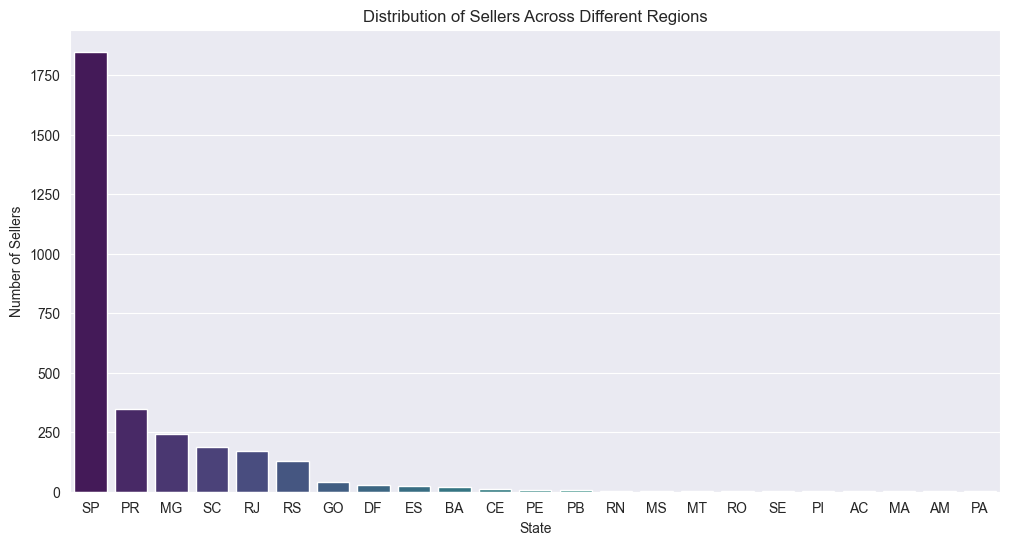

In [87]:
seller_distribution = seller_df['seller_state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=seller_distribution.index, y=seller_distribution.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.title('Distribution of Sellers Across Different Regions')
plt.show()

/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/434042004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_order_count, x='seller_state', y='order_id', palette='magma')


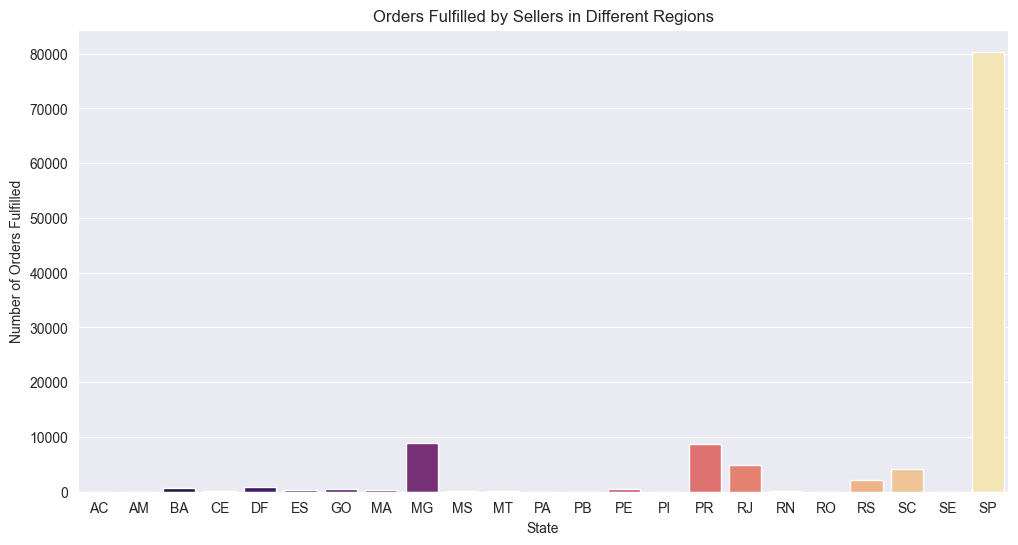

In [92]:
seller_order_count = item_seller_df.groupby('seller_state')['order_id'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=seller_order_count, x='seller_state', y='order_id', palette='magma')
plt.xlabel('State')
plt.ylabel('Number of Orders Fulfilled')
plt.title('Orders Fulfilled by Sellers in Different Regions')
plt.show()

/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/144646689.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=combined_df['seller_state'], y=combined_df['seller_count'], palette='viridis', label='Number of Sellers')


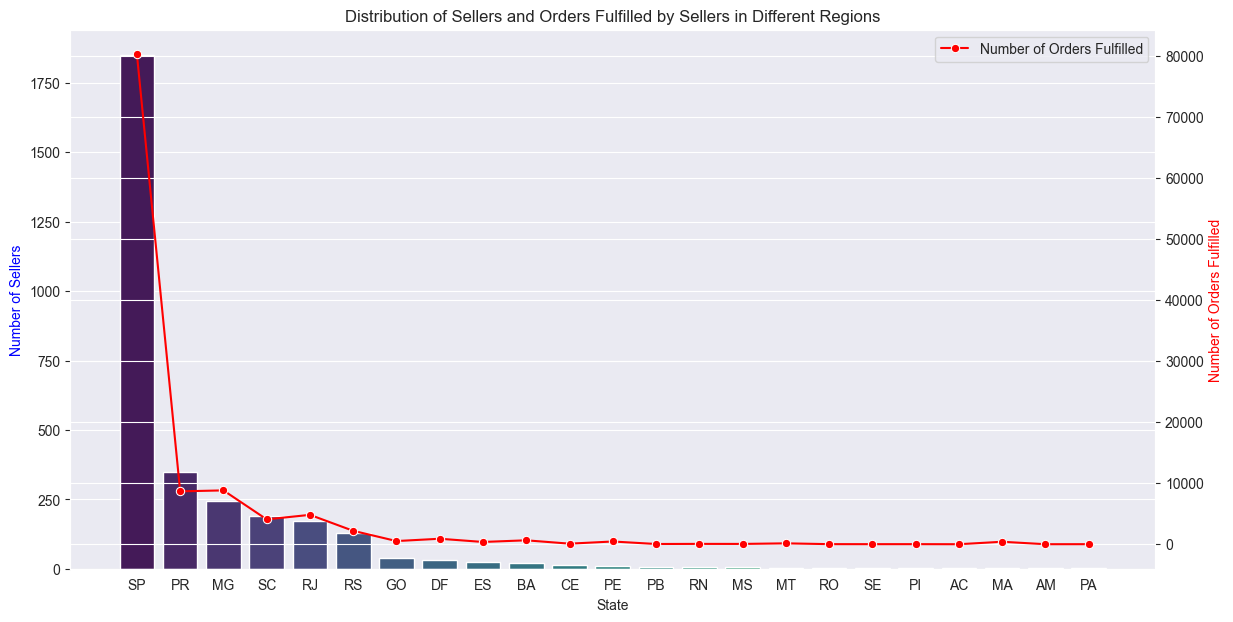

In [114]:
# Penggabungan kedua dataframe untuk analisis
seller_distribution_df = seller_df['seller_state'].value_counts().reset_index()
seller_distribution_df.columns = ['seller_state', 'seller_count']

seller_order_count = item_seller_df.groupby('seller_state')['order_id'].count().reset_index()
seller_order_count.columns = ['seller_state', 'order_count']

# Menggabungkan data distribusi penjual dan order
combined_df = pd.merge(seller_distribution_df, seller_order_count, on='seller_state')

# Menampilkan grafik penggabungan
fig, ax1 = plt.subplots(figsize=(14, 7))

# Grafik distribusi seller
ax1 = sns.barplot(x=combined_df['seller_state'], y=combined_df['seller_count'], palette='viridis', label='Number of Sellers')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Sellers', color='blue')

# Membuat axis kedua untuk order fulfillment
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=combined_df['seller_state'], y=combined_df['order_count'], color='red', marker='o', label='Number of Orders Fulfilled')
ax2.set_ylabel('Number of Orders Fulfilled', color='red')

# Menambahkan judul dan label
plt.title('Distribution of Sellers and Orders Fulfilled by Sellers in Different Regions')
plt.show()


**Insight:**
- xxx
- xxx

### Pertanyaan 2: Bagaimana lokasi penjual memengaruhi waktu pengiriman dan kepuasan pelanggan?

/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/1538822637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_times, x='seller_state', y='delivery_time', palette='plasma')


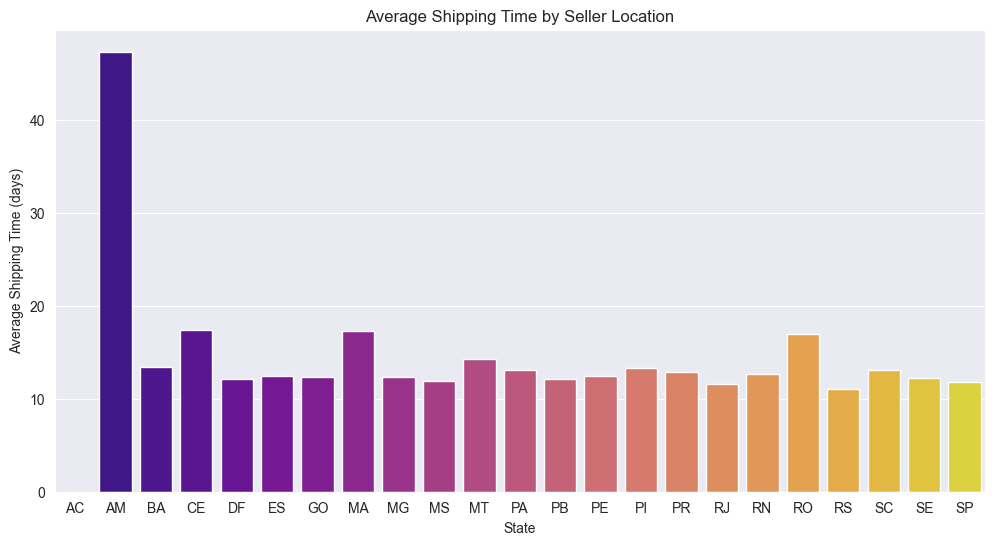

In [109]:
shipping_times = order_seller_df.groupby('seller_state')['delivery_time'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_times, x='seller_state', y='delivery_time', palette='plasma')
plt.xlabel('State')
plt.ylabel('Average Shipping Time (days)')
plt.title('Average Shipping Time by Seller Location')
plt.show()


/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/2874984891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_satisfaction, x='seller_state', y='review_score', palette='coolwarm')


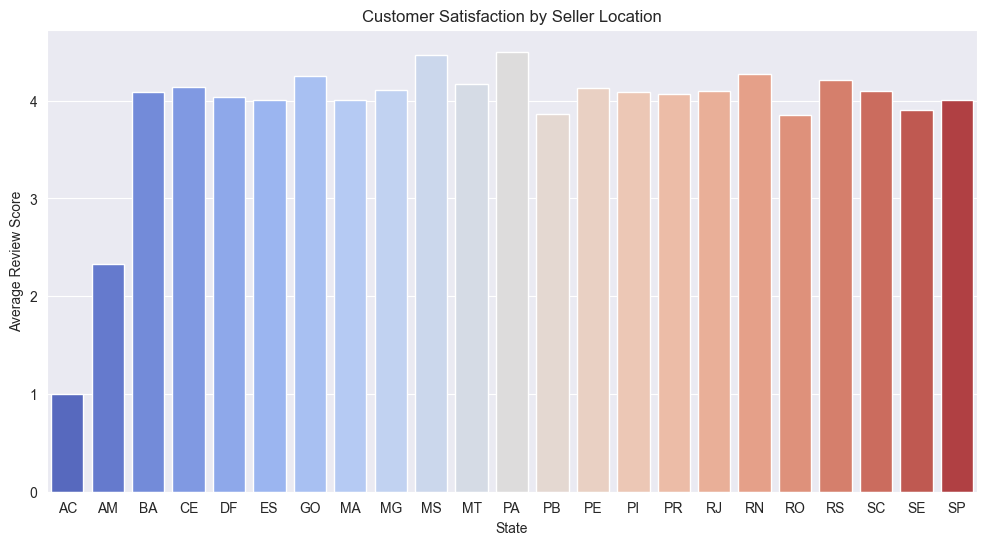

In [113]:
customer_satisfaction = riview_seller_df.groupby('seller_state')['review_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_satisfaction, x='seller_state', y='review_score', palette='coolwarm')
plt.xlabel('State')
plt.ylabel('Average Review Score')
plt.title('Customer Satisfaction by Seller Location')
plt.show()


/var/folders/s9/c8mgcn0930n68lhpl3cw27z40000gn/T/ipykernel_22174/2657347679.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=combined_df['seller_state'], y=combined_df['delivery_time'], palette='plasma', label='Average Shipping Time')


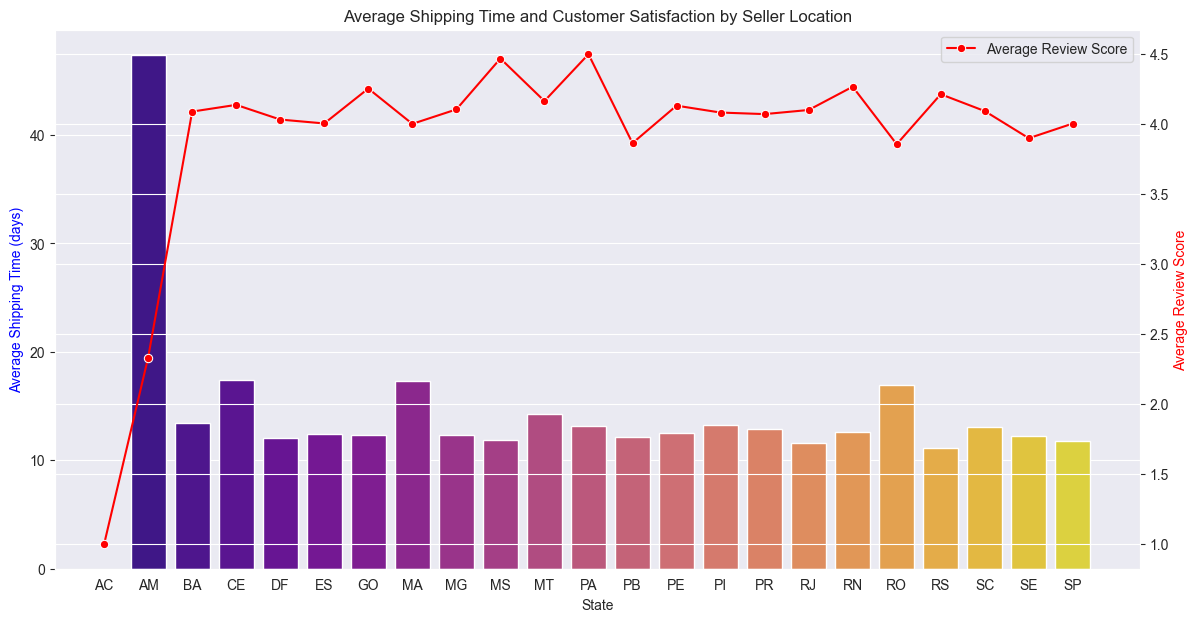

In [115]:
# Menggabungkan data waktu pengiriman dan kepuasan pelanggan berdasarkan lokasi seller
shipping_times = order_seller_df.groupby('seller_state')['delivery_time'].mean().reset_index()
customer_satisfaction = riview_seller_df.groupby('seller_state')['review_score'].mean().reset_index()

# Menggabungkan kedua dataframe
combined_df = pd.merge(shipping_times, customer_satisfaction, on='seller_state')

# Menampilkan grafik penggabungan
fig, ax1 = plt.subplots(figsize=(14, 7))

# Grafik waktu pengiriman rata-rata
ax1 = sns.barplot(x=combined_df['seller_state'], y=combined_df['delivery_time'], palette='plasma', label='Average Shipping Time')
ax1.set_xlabel('State')
ax1.set_ylabel('Average Shipping Time (days)', color='blue')

# Membuat axis kedua untuk review score (kepuasan pelanggan)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=combined_df['seller_state'], y=combined_df['review_score'], color='red', marker='o', label='Average Review Score')
ax2.set_ylabel('Average Review Score', color='red')

# Menambahkan judul dan label
plt.title('Average Shipping Time and Customer Satisfaction by Seller Location')
plt.show()


### Clean data to csv

In [122]:
all_data1 = pd.merge(
    left=riview_seller_df,
    right=customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data1.head()



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_sequential,payment_type,payment_installments,payment_value,review_id_y,review_score_y,review_comment_title_y,review_comment_message_y,review_creation_date_y,review_answer_timestamp_y
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment title,No comment message,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,No comment title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,No comment title,No comment message,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,No comment title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


## Conclusion

In [126]:
all_data2 = pd.merge(
    left=all_data1,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_data2.head()
all_data2.to_csv("all_data.csv", index=False)

- Conclution pertanyaan 1
Distribusi Penjual: Dari grafik distribusi penjual, kita bisa melihat bahwa beberapa wilayah memiliki jumlah penjual yang jauh lebih tinggi dibandingkan wilayah lainnya. Ini menunjukkan bahwa terdapat konsentrasi penjual yang lebih besar di beberapa daerah tertentu.

Jumlah Pesanan yang Dipenuhi: Ketika melihat jumlah pesanan yang dipenuhi berdasarkan wilayah, ada korelasi umum antara jumlah penjual dan jumlah pesanan yang mereka penuhi. Namun, ada wilayah tertentu di mana meskipun jumlah penjual tinggi, jumlah pesanan yang dipenuhi tidak terlalu tinggi, atau sebaliknya.

Pengaruh Terhadap Kinerja Pasar:

Wilayah dengan banyak penjual cenderung menerima lebih banyak pesanan, tetapi hal ini tidak selalu terjadi. Beberapa daerah dengan jumlah penjual yang lebih sedikit masih mampu memenuhi pesanan dalam jumlah yang besar.
Ini menunjukkan bahwa selain distribusi penjual, faktor lain seperti kualitas layanan, logistik, atau daya beli regional juga dapat mempengaruhi kinerja pasar secara keseluruhan.
Secara keseluruhan, distribusi penjual di berbagai wilayah memberikan pengaruh yang signifikan terhadap kinerja pasar, namun penting juga untuk mempertimbangkan aspek lain seperti efisiensi penjual dalam memenuhi pesanan dan preferensi pelanggan di setiap wilayah.

- Conclution pertanyaan 2
Waktu Pengiriman: Berdasarkan grafik, kita bisa melihat bahwa ada perbedaan yang cukup signifikan dalam rata-rata waktu pengiriman di berbagai wilayah. Beberapa wilayah cenderung memiliki waktu pengiriman yang lebih cepat, sementara wilayah lain mengalami waktu pengiriman yang lebih lama.

Kepuasan Pelanggan: Grafik kedua menunjukkan bagaimana ulasan pelanggan (skor kepuasan) bervariasi berdasarkan lokasi penjual. Ada wilayah dengan skor ulasan yang lebih tinggi, yang menunjukkan tingkat kepuasan pelanggan yang lebih baik.

Korelasi Antara Waktu Pengiriman dan Kepuasan Pelanggan:

Secara umum, wilayah dengan waktu pengiriman yang lebih cepat cenderung memiliki skor ulasan yang lebih tinggi, yang menunjukkan bahwa waktu pengiriman mempengaruhi kepuasan pelanggan.
Namun, ada juga beberapa pengecualian di mana waktu pengiriman yang lebih lama tidak selalu menghasilkan skor ulasan yang rendah, yang mungkin dipengaruhi oleh faktor lain seperti kualitas produk atau layanan pelanggan.
Pengaruh Lokasi Penjual Terhadap Pengiriman dan Kepuasan:

Lokasi penjual berperan penting dalam memengaruhi waktu pengiriman, dan ini pada gilirannya berdampak pada kepuasan pelanggan.
Pengiriman yang cepat cenderung menghasilkan pelanggan yang lebih puas, namun perlu juga mempertimbangkan kualitas layanan secara keseluruhan.
Kesimpulannya, lokasi penjual secara signifikan mempengaruhi waktu pengiriman, yang berdampak langsung pada kepuasan pelanggan, meskipun ada beberapa faktor lain yang juga memengaruhi ulasan pelanggan.
